In [1]:
# load dataset
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

2024-05-07 05:30:51.991553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 05:30:51.991646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 05:30:54.482279: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 05:30:59.043019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 05:31:12.006400: W tensorflow/comp

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
# y = 0 means -ve and 1 means +ve
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
y_train[0]

1

In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [3]:
# Turn list of integers to tensors.
import numpy as np

# Convert an review - a sequence of words to an vector of length 10000.. Fill one if word contain by review. 
# Do this for all reviews.
# Row is for review
# Column for word exist in review or not.

def vectorize_sequence(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result

x_train = vectorize_sequence(X_train)
x_test = vectorize_sequence(X_test)

In [5]:
# Our vectorized labels
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [6]:
# Building Network
# Input Vector and Output Scalar - Fully Connected - Dense
# Input of size 10,000 > 2 Dense Layer with 16 hidden units (relu) > 1 Output (Sigmoid)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 1st hidden layer. It will have 16 hidden unit and each unit will produce one output.
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # Output layer with one hidden unit and 1 output.

2024-05-07 05:40:45.869095: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="binary_crossentropy", metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.5248 - accuracy: 0.7690 - val_loss: 0.3935 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3173 - accuracy: 0.8958 - val_loss: 0.3122 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2360 - accuracy: 0.9222 - val_loss: 0.2843 - val_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1893 - accuracy: 0.9370 - val_loss: 0.2822 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1583 - accuracy: 0.9472 - val_loss: 0.2871 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1345 - accuracy: 0.9578 - val_loss: 0.2932 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1121 - accuracy: 0.9670 - val_loss: 0.3256 - val_accuracy: 0.8763
Epoch 8/20
30

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

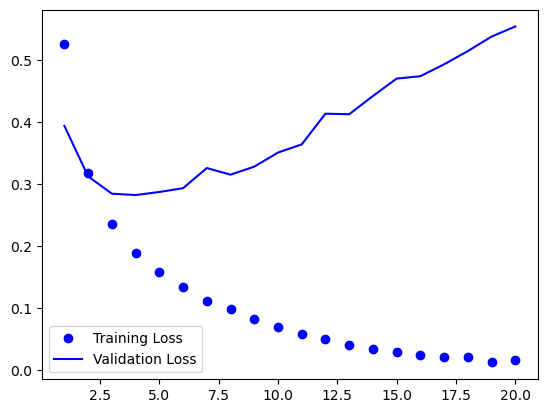

In [11]:
# Let's observe the behavior of iteration for train and validation data.
import matplotlib.pyplot as plt

# val stand for validation

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss') # blue dot
plt.plot(epochs, val_loss, 'b', label='Validation Loss') # solid blue line

plt.legend()
plt.show()

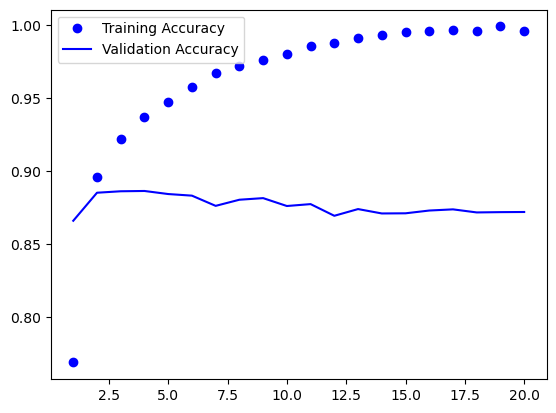

In [12]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy') # blue dot
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy') # solid blue line

plt.legend()
plt.show()

In [13]:
# epoch = 4 : Accuracy is max for validation data.
# Retrain

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1930 - accuracy: 0.9470
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1248 - accuracy: 0.9619
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0960 - accuracy: 0.9705
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.4637 - accuracy: 0.8635


In [14]:
results

[0.4636767506599426, 0.8635200262069702]

In [ ]:
# 86% accuracy in test data.
# predict values - 0.99 or more and 0.01 or less - Very confident
#                - 0.4-0.6 - Less Confident.